In [1]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.3 MB/s eta 0:00:00


In [2]:
import os
import urllib.request
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception

In [3]:
# Unduh dan Ekstrak Dataset
data_url = 'https://drive.usercontent.google.com/download?id=1T2vteOAvBrj23MK3ry_ynLWli4_gNbqe&export=download&confirm=t'
urllib.request.urlretrieve(data_url, 'Datasets.zip')
with zipfile.ZipFile('Datasets.zip', 'r') as zip_ref:
    zip_ref.extractall('Datasets')

base_dir = 'Datasets'
train_path = os.path.join(base_dir, 'Dataset/train')
val_path = os.path.join(base_dir, 'Dataset/validation')
test_path = os.path.join(base_dir, 'Dataset/test')

In [4]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(299, 299),
    batch_size=64,
    class_mode='categorical'
)


Found 1062 images belonging to 3 classes.
Found 298 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [5]:
# Xception Base Model
pre_trained_model = Xception(input_shape=(299, 299, 3),
                              include_top=False,
                              weights='imagenet')

# Bekukan semua layer kecuali 30 terakhir
for layer in pre_trained_model.layers[:-30]:
    layer.trainable = False
for layer in pre_trained_model.layers[-30:]:
    layer.trainable = True

last_layer_output = pre_trained_model.output
print(f'Output shape of the Xception base model: {last_layer_output.shape}')

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Output shape of the Xception base model: (None, 10, 10, 2048)


In [6]:
# Model Tambahan dan Training
x = layers.GlobalAveragePooling2D()(last_layer_output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(3, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'Xception_model.h5',
    monitor='val_acc',
    save_best_only=True
)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[model_checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - acc: 0.5576 - loss: 0.9211

17/17 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - acc: 0.5620 - loss: 0.9137 - val_acc: 0.8020 - val_loss: 0.6141
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7725 - loss: 0.5206

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.7734 - loss: 0.5193 - val_acc: 0.8591 - val_loss: 0.5588
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.8418 - loss: 0.3719 - val_acc: 0.8188 - val_loss: 0.6837
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.8845 - loss: 0.2961 - val_acc: 0.8389 - val_loss: 0.6631
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.8852 - loss: 0.3093 - val_acc: 0.7617 - val_loss: 1.0883
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.8989 - loss: 0.2613 - val_acc: 0.8490 - val_loss: 0.4922
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9030 - loss: 0.2422 - val_acc: 0.8255 - val_loss: 0.7161
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9422 - loss: 0.1757 - val_acc: 0.7987 - val_loss: 0.7073
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9370 - loss: 0.1650 - val_acc: 0.7819 - val_loss: 1.1032
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9379 - loss: 0.1844 - v

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9468 - loss: 0.1645 - val_acc: 0.8725 - val_loss: 0.5660
Epoch 13/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9682 - loss: 0.1156 - val_acc: 0.8456 - val_loss: 0.5783
Epoch 14/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9500 - loss: 0.1248 - val_acc: 0.8188 - val_loss: 0.6703
Epoch 15/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9639 - loss: 0.1098 - val_acc: 0.8356 - val_loss: 0.5579
Epoch 16/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9704 - loss: 0.0881 - val_acc: 0.8691 - val_loss: 0.6598
Epoch 17/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9656 - loss: 0.0912 - val_acc: 0.8423 - val_loss: 0.8538
Epoch 18/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9743 - loss: 0.0789 - val_acc: 0.7987 - val_loss: 1.6673
Epoch 19/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9651 - loss: 0.0869 - val_acc: 0.8423 - val_loss: 1.1376
Epoch 20/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9569 - loss: 0.1

17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9841 - loss: 0.0577 - val_acc: 0.8792 - val_loss: 0.6340
Epoch 35/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9897 - loss: 0.0374 - val_acc: 0.8624 - val_loss: 0.6912
Epoch 36/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - acc: 0.9831 - loss: 0.0547 - val_acc: 0.8456 - val_loss: 0.7292
Epoch 37/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9781 - loss: 0.0703 - val_acc: 0.8356 - val_loss: 1.0156
Epoch 38/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9866 - loss: 0.0479 - val_acc: 0.8490 - val_loss: 1.0704
Epoch 39/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9730 - loss: 0.0661 - val_acc: 0.8356 - val_loss: 1.0300
Epoch 40/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - acc: 0.9878 - loss: 0.0357 - val_acc: 0.8121 - val_loss: 0.8941
Epoch 41/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9842 - loss: 0.0415 - val_acc: 0.8490 - val_loss: 0.8535
Epoch 42/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - acc: 0.9877 - loss: 0.0

In [7]:
train_path = os.path.join(base_dir, "Dataset/train")
val_path = os.path.join(base_dir, "Dataset/validation")
test_path = os.path.join(base_dir, "Dataset/test")

train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(299, 299),
    batch_size=128,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
validation_generator = validation_datagen.flow_from_directory(
    val_path,
    target_size=(299, 299),
    batch_size=128,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(299, 299),
    batch_size=128,
    class_mode='categorical'
)

model = tf.keras.models.load_model('Xception_model.h5')

train_loss, train_acc = model.evaluate(train_generator, verbose=1)
val_loss, val_acc = model.evaluate(validation_generator, verbose=1)
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print(f"Train Accuracy: {train_acc:.4f}, Loss: {train_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")

Found 1062 images belonging to 3 classes.
Found 298 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


9/9 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - acc: 0.9895 - loss: 0.0206
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - acc: 0.8761 - loss: 0.6287
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 10s/step - acc: 0.8386 - loss: 1.0442
Train Accuracy: 0.9906, Loss: 0.0205
Validation Accuracy: 0.8792, Loss: 0.6340
Test Accuracy: 0.8400, Loss: 1.0385


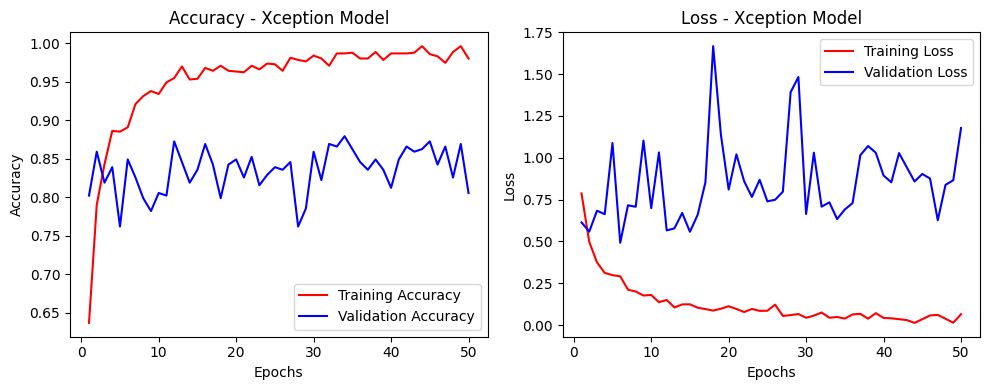

In [8]:
import matplotlib.pyplot as plt

# Ambil riwayat dari training
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Akurasi
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Accuracy - Xception Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss - Xception Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical

In [10]:
def load_and_process_image(image_path, target_size=(299, 299)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    return img_array

def load_test_data(test_dir, class_names):
    data = []
    labels = []
    class_mapping = {name: idx for idx, name in enumerate(class_names)}
    for class_name in class_names:
        class_path = os.path.join(test_dir, class_name)
        if not os.path.isdir(class_path):
            print(f"Warning: Folder {class_path} not found.")
            continue
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                data.append(load_and_process_image(image_path))
                labels.append(class_mapping[class_name])
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")
    return np.array(data), np.array(labels)

Error loading image Datasets/Dataset/validation/Bagus/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7e5f806ffc40>
Error loading image Datasets/Dataset/validation/Rusak Berat/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7e5f80545300>
Error loading image Datasets/Dataset/validation/Rusak Ringan/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7e5f80545b70>


10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step


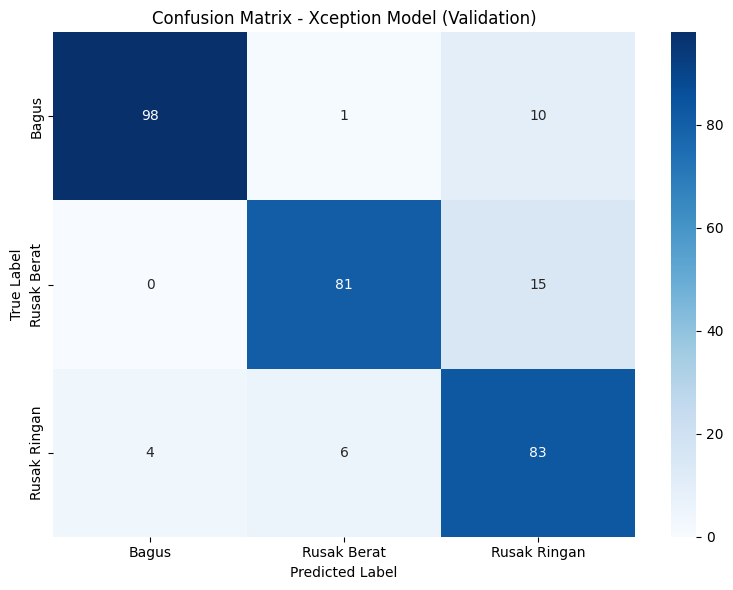


Classification Report (Validation Data):
              precision    recall  f1-score   support

       Bagus       0.96      0.90      0.93       109
 Rusak Berat       0.92      0.84      0.88        96
Rusak Ringan       0.77      0.89      0.83        93

    accuracy                           0.88       298
   macro avg       0.88      0.88      0.88       298
weighted avg       0.89      0.88      0.88       298



In [11]:
test_data_dir = val_path
class_names = sorted(os.listdir(test_data_dir))
X_test, y_test = load_test_data(test_data_dir, class_names)

model = keras.models.load_model('Xception_model.h5')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(to_categorical(y_test, num_classes=len(class_names)), axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Xception Model (Validation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

print("\nClassification Report (Validation Data):")
print(class_report)

Error loading image Datasets/Dataset/train/Rusak Ringan/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7e5f7457df30>
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 383ms/step


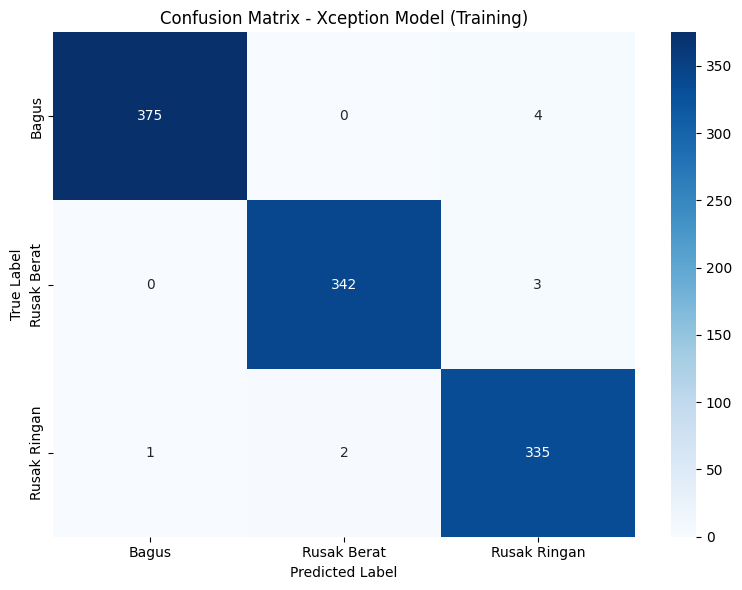


Classification Report (Training Data):
              precision    recall  f1-score   support

       Bagus       1.00      0.99      0.99       379
 Rusak Berat       0.99      0.99      0.99       345
Rusak Ringan       0.98      0.99      0.99       338

    accuracy                           0.99      1062
   macro avg       0.99      0.99      0.99      1062
weighted avg       0.99      0.99      0.99      1062



In [12]:
test_data_dir = train_path
class_names = sorted(os.listdir(test_data_dir))
X_test, y_test = load_test_data(test_data_dir, class_names)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(to_categorical(y_test, num_classes=len(class_names)), axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Xception Model (Training)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

print("\nClassification Report (Training Data):")
print(class_report)

Error loading image Datasets/Dataset/test/Bagus/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7e5ff8c93830>
Error loading image Datasets/Dataset/test/Rusak Berat/desktop.ini: cannot identify image file <_io.BytesIO object at 0x7e5f743d61b0>
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 635ms/step


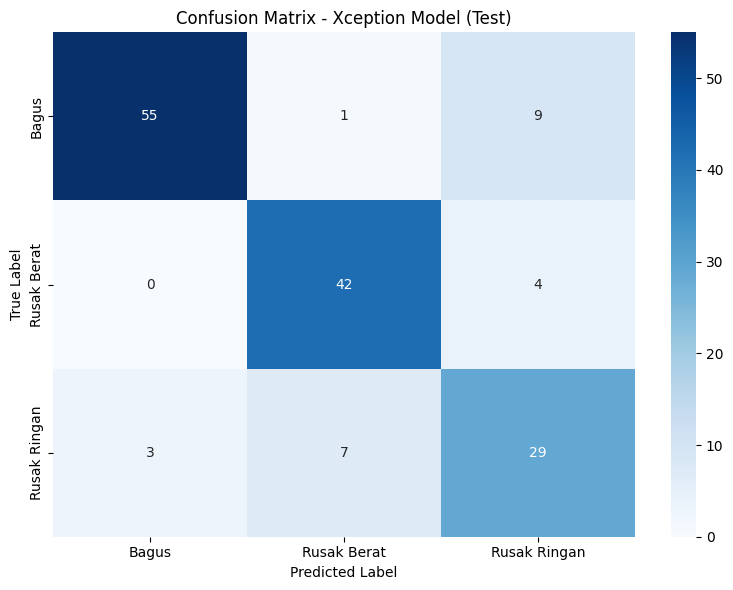


Classification Report (Test Data):
              precision    recall  f1-score   support

       Bagus       0.95      0.85      0.89        65
 Rusak Berat       0.84      0.91      0.88        46
Rusak Ringan       0.69      0.74      0.72        39

    accuracy                           0.84       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.85      0.84      0.84       150



In [13]:
test_data_dir = test_path
class_names = sorted(os.listdir(test_data_dir))
X_test, y_test = load_test_data(test_data_dir, class_names)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(to_categorical(y_test, num_classes=len(class_names)), axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Xception Model (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

print("\nClassification Report (Test Data):")
print(class_report)